<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/ML_DL_AI_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Okay, I will generate individual code examples for each of the items you listed.

1. Basic Linear Regression Model
This example will demonstrate a simple linear regression model using NumPy for numerical operations. It will include generating synthetic data, defining the model, and implementing gradient descent to find the optimal parameters.



In [3]:
import numpy as np

# 1. Generate synthetic data
# y = 2*x + 1 + noise
np.random.seed(42) # for reproducibility
X = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) * 2 # y = 4 + 3x + noise [cite: 77]

# Add x0 = 1 to each instance for bias term
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance [cite: 91]

# 2. Define the linear regression model hypothesis [cite: 77]
# h_theta(x) = theta0 + theta1*x1
# In vectorized form: h_theta(x) = X_b @ theta

# 3. Implement Gradient Descent [cite: 76]
learning_rate = 0.1 # alpha in the document [cite: 76]
n_iterations = 1000
m = 100 # number of training examples [cite: 85]

# Random initialization of parameters (theta) [cite: 82]
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    # Calculate predictions
    predictions = X_b.dot(theta)
    # Calculate errors (residuals) [cite: 402]
    errors = predictions - y
    # Calculate gradients
    gradients = 2/m * X_b.T.dot(errors)
    # Update parameters [cite: 76]
    theta = theta - learning_rate * gradients

print("--- Basic Linear Regression Model ---")
print("Optimal parameters (theta):")
print(theta)
print(f"Expected parameters around: [[4],[3]] (due to y = 4 + 3*X + noise)")

# You can also get the closed-form solution (Normal Equation) for comparison [cite: 84]
theta_best_analytical = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("\nParameters from Normal Equation:")
print(theta_best_analytical)

--- Basic Linear Regression Model ---
Optimal parameters (theta):
[[4.43019232]
 [2.54022677]]
Expected parameters around: [[4],[3]] (due to y = 4 + 3*X + noise)

Parameters from Normal Equation:
[[4.43019232]
 [2.54022677]]


2. Simple K-Means Clustering Algorithm
This example implements the K-Means algorithm from scratch using NumPy.


--- K-Means Clustering Algorithm ---


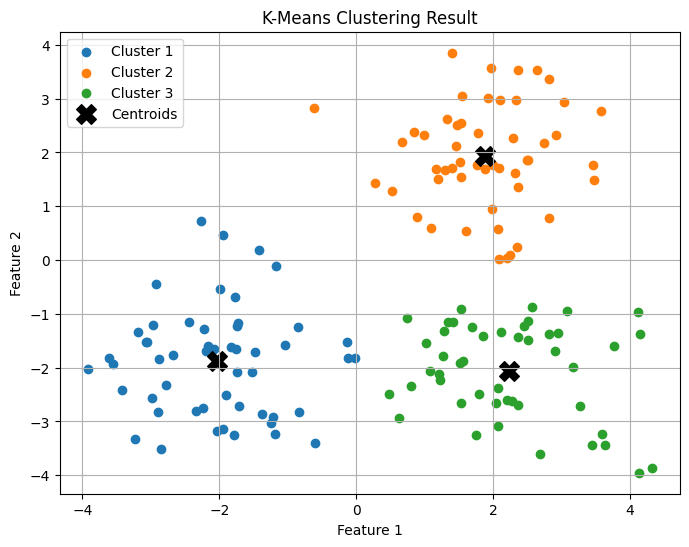

Final Centroids:
[[-2.03921257 -1.88143905]
 [ 1.87708365  1.92650708]
 [ 2.23827021 -2.0632449 ]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic data for clustering
np.random.seed(42)
X = np.concatenate([
    np.random.randn(50, 2) + np.array([2, 2]),
    np.random.randn(50, 2) + np.array([-2, -2]),
    np.random.randn(50, 2) + np.array([2, -2])
])

def kmeans(X, k, max_iters=100):
    m, n = X.shape # m samples, n features [cite: 123]

    # 2. Randomly initialize the cluster centroids [cite: 123]
    # centroids = X[np.random.choice(m, k, replace=False)] # Choose k random data points as initial centroids
    # A safer initialization to ensure unique centroids, or just random values
    centroids = np.random.uniform(X.min(axis=0), X.max(axis=0), size=(k, n))

    for i in range(max_iters):
        # E-step: Assign each data point to the closest centroid [cite: 123]
        # Calculate distances from each point to each centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        # Assign each point to the cluster of the closest centroid
        cluster_assignments = np.argmin(distances, axis=0) # c^(i) = argmin_j ||x^(i) - mu_j||^2 [cite: 123]

        # M-step: Update centroids based on the new assignments [cite: 123]
        new_centroids = np.array([X[cluster_assignments == j].mean(axis=0) if np.sum(cluster_assignments == j) > 0 else centroids[j]
                                  for j in range(k)]) # mu_j = (sum 1_{c^(i)=j} x^(i)) / (sum 1_{c^(i)=j}) [cite: 123]

        # Check for convergence
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids

    return cluster_assignments, centroids

print("\n--- K-Means Clustering Algorithm ---")
k = 3 # Number of clusters
cluster_assignments, centroids = kmeans(X, k)

# Plotting the results
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[cluster_assignments == i, 0], X[cluster_assignments == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

print("Final Centroids:")
print(centroids)

3. Neural Network with a Specific Activation Function (Sigmoid)
This example builds a simple feedforward neural network with one hidden layer using NumPy, demonstrating forward propagation and backpropagation with the sigmoid activation function.

In [5]:
import numpy as np

# Sigmoid activation function [cite: 86, 145, 308, 377]
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid function [cite: 419]
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# 1. Generate synthetic data for classification
np.random.seed(42)
X = np.random.rand(100, 2) * 10 - 5 # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 0).astype(int).reshape(-1, 1) # Binary classification: sum > 0

# Neural Network Architecture
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1 # alpha for weights update [cite: 147, 382]
n_epochs = 10000

# Initialize weights and biases [cite: 142]
# Weights and biases for the hidden layer
W1 = np.random.randn(input_size, hidden_size) * 0.01 # w [cite: 142]
b1 = np.zeros((1, hidden_size)) # b [cite: 142]

# Weights and biases for the output layer
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Loss function: Binary Cross-Entropy [cite: 146, 364]
def cross_entropy_loss(y_true, y_pred):
    # Clip predictions to avoid log(0)
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

print("\n--- Neural Network with Sigmoid Activation ---")

for epoch in range(n_epochs):
    # Forward Propagation [cite: 150, 369]
    Z1 = X.dot(W1) + b1 # z = W^T * x + b [cite: 142]
    A1 = sigmoid(Z1) # A = g(Z) (activation) [cite: 143]

    Z2 = A1.dot(W2) + b2
    A2 = sigmoid(Z2) # Output probabilities

    # Calculate Loss
    loss = cross_entropy_loss(y, A2)

    # Backpropagation [cite: 148, 365]
    # Output layer gradients
    dZ2 = A2 - y # Derivative of cross-entropy with sigmoid [cite: 149]
    dW2 = A1.T.dot(dZ2) / len(X) # dL/dW = A1.T * dZ2 [cite: 149]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)

    # Hidden layer gradients
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = X.T.dot(dZ1) / len(X)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

    # Update weights and biases [cite: 151, 370]
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % (n_epochs / 10) == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Make predictions
final_predictions = (A2 > 0.5).astype(int)
accuracy = np.mean(final_predictions == y)
print(f"\nTraining Accuracy: {accuracy:.4f}")


--- Neural Network with Sigmoid Activation ---
Epoch 0, Loss: 0.6932
Epoch 1000, Loss: 0.0763
Epoch 2000, Loss: 0.0474
Epoch 3000, Loss: 0.0375
Epoch 4000, Loss: 0.0324
Epoch 5000, Loss: 0.0291
Epoch 6000, Loss: 0.0269
Epoch 7000, Loss: 0.0251
Epoch 8000, Loss: 0.0238
Epoch 9000, Loss: 0.0226

Training Accuracy: 0.9900


4. Python Function to Calculate Probability (Bernoulli Distribution)
This function will calculate the Probability Mass Function (PMF) for a Bernoulli random variable.

In [6]:
import numpy as np

# Bernoulli random variable example [cite: 17]
# X ~ Ber(p)
# P(X=1) = p
# P(X=0) = 1-p

def bernoulli_pmf(k, p):
    """
    Calculates the Probability Mass Function (PMF) for a Bernoulli random variable.

    Args:
        k (int): The outcome (0 for failure, 1 for success).
        p (float): The probability of success (0 <= p <= 1).

    Returns:
        float: The probability of outcome k.
    """
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")
    if k == 1:
        return p # P(X=1) = p [cite: 17]
    elif k == 0:
        return 1 - p # P(X=0) = 1-p [cite: 17]
    else:
        return 0 # k must be 0 or 1

print("\n--- Bernoulli Probability Function ---")
p_success = 0.7 # Example probability of success

prob_1 = bernoulli_pmf(1, p_success)
prob_0 = bernoulli_pmf(0, p_success)

print(f"Probability of success (k=1) with p={p_success}: {prob_1:.2f}")
print(f"Probability of failure (k=0) with p={p_success}: {prob_0:.2f}")

# Example: Expected value of a Bernoulli RV is p [cite: 24]
expected_value_bernoulli = p_success
print(f"Expected value of this Bernoulli RV: {expected_value_bernoulli:.2f}")

# Example: Variance of a Bernoulli RV is p(1-p) [cite: 29]
variance_bernoulli = p_success * (1 - p_success)
print(f"Variance of this Bernoulli RV: {variance_bernoulli:.2f}")


--- Bernoulli Probability Function ---
Probability of success (k=1) with p=0.7: 0.70
Probability of failure (k=0) with p=0.7: 0.30
Expected value of this Bernoulli RV: 0.70
Variance of this Bernoulli RV: 0.21


5. Matrix Operations (Multiplication and Transpose)
This example demonstrates basic matrix multiplication and transpose operations using NumPy.

In [7]:
import numpy as np

print("\n--- Matrix Operations (Multiplication and Transpose) ---")

# Define two example matrices
A = np.array([[1, 2, 3],
              [4, 5, 6]]) # A is a 2x3 matrix [cite: 219]

B = np.array([[7, 8],
              [9, 10],
              [11, 12]]) # B is a 3x2 matrix [cite: 219]

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)

# Matrix Multiplication (A @ B) [cite: 223]
# For A (m x n) and B (n x p), the product C (m x p)
# Here, A is 2x3, B is 3x2, so result will be 2x2
C = A @ B
print("\nMatrix Multiplication (A @ B):")
print(C)

# Verify dimensions
print(f"Dimensions of A: {A.shape}")
print(f"Dimensions of B: {B.shape}")
print(f"Dimensions of A @ B: {C.shape}")

# Matrix Transpose [cite: 223]
A_T = A.T
print("\nMatrix Transpose of A (A.T):")
print(A_T)
print(f"Dimensions of A.T: {A_T.shape}")

# Properties of Transpose: (AB)^T = B^T A^T [cite: 224]
AB_T = (A @ B).T
B_T_A_T = B.T @ A.T

print("\nProperty: (AB)^T == B^T A^T")
print(f"(A @ B).T:\n{AB_T}")
print(f"B.T @ A.T:\n{B_T_A_T}")
print(f"Are they equal? {np.array_equal(AB_T, B_T_A_T)}")

# Trace of a square matrix [cite: 225]
# Trace is only for square matrices. Let's make a square matrix.
Square_Matrix = np.array([[1, 2], [3, 4]])
trace_val = np.trace(Square_Matrix)
print("\nTrace of a square matrix:")
print(f"Matrix:\n{Square_Matrix}")
print(f"Trace: {trace_val}") # Sum of diagonal entries [cite: 225]


--- Matrix Operations (Multiplication and Transpose) ---
Matrix A:
[[1 2 3]
 [4 5 6]]

Matrix B:
[[ 7  8]
 [ 9 10]
 [11 12]]

Matrix Multiplication (A @ B):
[[ 58  64]
 [139 154]]
Dimensions of A: (2, 3)
Dimensions of B: (3, 2)
Dimensions of A @ B: (2, 2)

Matrix Transpose of A (A.T):
[[1 4]
 [2 5]
 [3 6]]
Dimensions of A.T: (3, 2)

Property: (AB)^T == B^T A^T
(A @ B).T:
[[ 58 139]
 [ 64 154]]
B.T @ A.T:
[[ 58 139]
 [ 64 154]]
Are they equal? True

Trace of a square matrix:
Matrix:
[[1 2]
 [3 4]]
Trace: 5
